In [27]:
from load_data import ImageDownloader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd
import os
import random

In [2]:
curr_path = os.getcwd()
loader_root = curr_path + "/data"
csv_remote_path = "https://raw.githubusercontent.com/NationalGalleryOfArt/opendata/main/data/published_images.csv"
percent = 100  
num_images = 200  # Number of images to download

downloader = ImageDownloader(loader_root, csv_remote_path)
downloader.download(percent=percent, num_images=num_images)

CSV not found, downloading from https://raw.githubusercontent.com/NationalGalleryOfArt/opendata/main/data/published_images.csv
Download successful
Reading annotations from /home/jovyan/PSY/gsoc/Painting_similarity_AI/data/annotations/published_images.csv
Found 116251 images.


100%|██████████| 200/200 [00:10<00:00, 19.10it/s]


Done downloading images


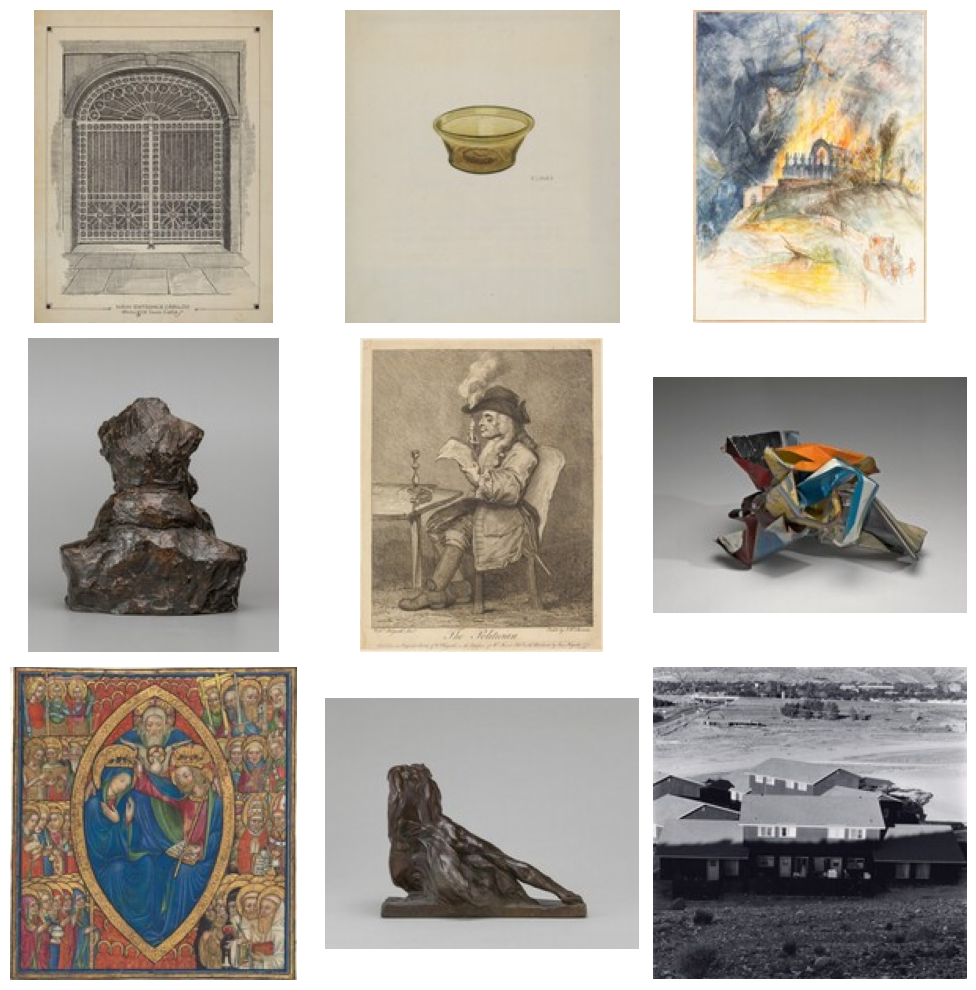

In [39]:
folder_path = './data/images'
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
selected_images = random.sample(image_files, 9)


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, image_file in enumerate(selected_images):
    img_path = os.path.join(folder_path, image_file)
    img = Image.open(img_path)
    axes[i // 3, i % 3].imshow(img)
    axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

In [16]:
csv_path = './data/annotations/published_images.csv'
df = pd.read_csv(csv_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116251 entries, 0 to 116250
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   uuid                116251 non-null  object 
 1   iiifurl             116251 non-null  object 
 2   iiifthumburl        116251 non-null  object 
 3   viewtype            116251 non-null  object 
 4   sequence            116251 non-null  float64
 5   width               116251 non-null  int64  
 6   height              116251 non-null  int64  
 7   maxpixels           48170 non-null   float64
 8   created             116251 non-null  object 
 9   modified            116251 non-null  object 
 10  depictstmsobjectid  116251 non-null  int64  
 11  assistivetext       1374 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 10.6+ MB


In [ ]:
 #iiifThumbURL        character varying(512).		An example of the IIIF URL for the image that generates a small thumbnail sized to fit in a 200x200 pixel box

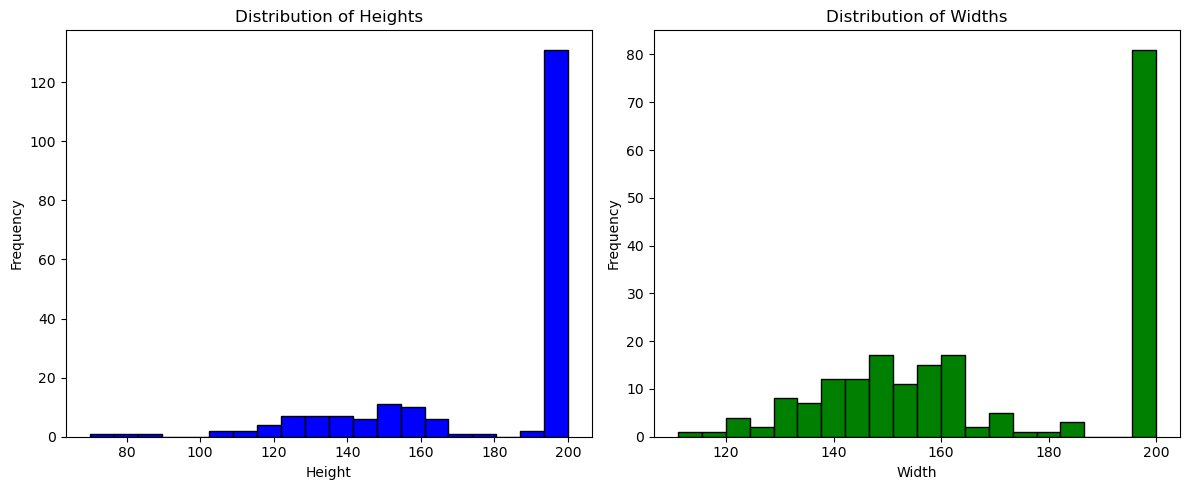

In [41]:
heights = []
widths = []

for image_file in image_files:
    path = os.path.join(folder_path+'/'+image_file)
    img = Image.open(path)
    width, height = img.size
    widths.append(width)
    heights.append(height)

# Create subplots for height and width histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting histogram for heights
ax1.hist(heights, bins=20, color='blue', edgecolor='black')
ax1.set_xlabel('Height')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Heights')

# Plotting histogram for widths
ax2.hist(widths, bins=20, color='green', edgecolor='black')
ax2.set_xlabel('Width')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Widths')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [42]:
df.head(5)

,uuid,iiifurl,iiifthumburl,viewtype,sequence,width,height,maxpixels,created,modified,depictstmsobjectid,assistivetext
0,00007f61-4922-417b-8f27-893ea328206c,https://api.nga.gov/iiif/00007f61-4922-417b-8f...,https://api.nga.gov/iiif/00007f61-4922-417b-8f...,primary,0.0,3365,4332,NaN,2013-07-05 15:41:08-04,2023-07-27 12:06:38-04,17387,NaN
1,0000bd8c-39de-4453-b55d-5e28a9beed38,https://api.nga.gov/iiif/0000bd8c-39de-4453-b5...,https://api.nga.gov/iiif/0000bd8c-39de-4453-b5...,primary,0.0,3500,4688,NaN,2013-08-05 14:31:59-04,2023-07-27 12:11:57-04,19245,NaN
2,0001668a-dd1c-48e8-9267-b6d1697d43c8,https://api.nga.gov/iiif/0001668a-dd1c-48e8-92...,https://api.nga.gov/iiif/0001668a-dd1c-48e8-92...,primary,0.0,3446,4448,NaN,2014-01-02 14:50:50-05,2023-07-27 12:39:11-04,23830,NaN
3,00032658-8a7a-44e3-8bb8-df8c172f521d,https://api.nga.gov/iiif/00032658-8a7a-44e3-8b...,https://api.nga.gov/iiif/00032658-8a7a-44e3-8b...,primary,0.0,2674,3798,NaN,2010-10-13 15:37:25-04,2023-07-27 15:51:54-04,713,NaN
4,0003d4e4-d7fd-4835-8d27-1e9e20672e39,https://api.nga.gov/iiif/0003d4e4-d7fd-4835-8d...,https://api.nga.gov/iiif/0003d4e4-d7fd-4835-8d...,primary,0.0,3000,2648,640.0,2014-11-19 14:24:42-05,2023-11-07 14:13:17-05,71457,NaN
